# Data Preparation

Clean up the dataset and perform basic EDA

Toy data comes from https://data.mendeley.com/datasets/5cxyb5fp4f/1

In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

import random

import os
os.getcwd()

'/Users/fujinhuizi/Desktop/insurance_ml/project'

In [3]:
insurance = pd.read_csv('./data/Motor_vehicle_insurance_data.csv', sep=';')

/var/folders/9r/8c_k_4cj5571k3ct1nx0vtth0000gn/T/ipykernel_45641/2184450615.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  insurance = pd.read_csv('./data/Motor_vehicle_insurance_data.csv', sep=';')


In [4]:
insurance.isna().mean()

# Type_fuel               0.016712
# Length                  0.097854
# Date_lapse              0.667027

ID                      0.000000
Date_start_contract     0.000000
Date_last_renewal       0.000000
Date_next_renewal       0.000000
Date_birth              0.000000
Date_driving_licence    0.000000
Distribution_channel    0.000000
Seniority               0.000000
Policies_in_force       0.000000
Max_policies            0.000000
Max_products            0.000000
Lapse                   0.000000
Date_lapse              0.667027
Payment                 0.000000
Premium                 0.000000
Cost_claims_year        0.000000
N_claims_year           0.000000
N_claims_history        0.000000
R_Claims_history        0.000000
Type_risk               0.000000
Area                    0.000000
Second_driver           0.000000
Year_matriculation      0.000000
Power                   0.000000
Cylinder_capacity       0.000000
Value_vehicle           0.000000
N_doors                 0.000000
Type_fuel               0.016712
Length                  0.097854
Weight                  0.000000
dtype: flo

In [5]:
insurance['contract_year'] = insurance['Date_start_contract'].str.strip().str[-4:].astype(int)

insurance['birth_year'] = insurance['Date_birth'].str.strip().str[-4:].astype(int)

insurance['driver_age'] = insurance['contract_year'] - insurance['birth_year']

insurance['year_dr_license'] = insurance['Date_driving_licence'].str.strip().str[-4:].astype(int)

insurance['year_driving'] = insurance['contract_year'] - insurance['year_dr_license']

insurance['tenure'] = insurance['contract_year'] - insurance['Year_matriculation'].astype(int)




In [6]:
insurance['Type_fuel'].value_counts()

Type_fuel
D    64998
P    38793
Name: count, dtype: int64

In [7]:
# new category for type fuel: unknown
insurance['Type_fuel'] = insurance['Type_fuel'].fillna("U")

In [8]:
# make up some vehicle data
insurance['Length'].describe()

count    95226.000000
mean         4.252007
std          0.393220
min          1.978000
25%          3.999000
50%          4.230000
75%          4.443000
max          8.218000
Name: Length, dtype: float64

In [9]:
insurance

,ID,Date_start_contract,Date_last_renewal,Date_next_renewal,Date_birth,Date_driving_licence,Distribution_channel,Seniority,Policies_in_force,Max_policies,Max_products,Lapse,Date_lapse,Payment,Premium,Cost_claims_year,N_claims_year,N_claims_history,R_Claims_history,Type_risk,Area,Second_driver,Year_matriculation,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Length,Weight,contract_year,birth_year,driver_age,year_dr_license,year_driving,tenure
0,1,05/11/2015,05/11/2015,05/11/2016,15/04/1956,20/03/1976,0,4,1,2,1,0,NaN,0,222.52,0.0,0,0,0.0,1,0,0,2004,80,599,7068.00,0,P,NaN,190,2015,1956,59,1976,39,11
1,1,05/11/2015,05/11/2016,05/11/2017,15/04/1956,20/03/1976,0,4,1,2,1,0,NaN,0,213.78,0.0,0,0,0.0,1,0,0,2004,80,599,7068.00,0,P,NaN,190,2015,1956,59,1976,39,11
2,1,05/11/2015,05/11/2017,05/11/2018,15/04/1956,20/03/1976,0,4,2,2,1,0,NaN,0,214.84,0.0,0,0,0.0,1,0,0,2004,80,599,7068.00,0,P,NaN,190,2015,1956,59,1976,39,11
3,1,05/11/2015,05/11/2018,05/11/2019,15/04/1956,20/03/1976,0,4,2,2,1,0,NaN,0,216.99,0.0,0,0,0.0,1,0,0,2004,80,599,7068.00,0,P,NaN,190,2015,1956,59,1976,39,11
4,2,26/09/2017,26/09/2017,26/09/2018,15/04/1956,20/03/1976,0,4,2,2,1,0,NaN,1,213.70,0.0,0,0,0.0,1,0,0,2004,80,599,7068.00,0,P,NaN,190,2017,1956,61,1976,41,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105550,53498,30/07/2018,30/07/2018,30/07/2019,25/07/1981,14/02/2007,0,1,1,1,1,0,NaN,0,263.79,0.0,0,0,0.0,3,0,0,2000,110,1997,24320.00,5,D,4.740,1480,2018,1981,37,2007,11,18
105551,53499,16/08/2018,16/08/2018,16/08/2019,08/12/1976,29/11/2017,0,1,1,1,1,0,NaN,0,418.97,0.0,0,0,0.0,3,0,0,2013,129,1998,30861.97,5,P,4.650,1440,2018,1976,42,2017,1,5
105552,53500,21/11/2018,21/11/2018,21/11/2019,01/04/1974,05/10/2011,0,1,1,1,1,0,NaN,1,571.91,0.0,0,0,0.0,3,0,0,1999,55,999,7800.00,5,P,3.495,830,2018,1974,44,2011,7,19
105553,53501,21/11/2018,21/11/2018,21/11/2019,15/09/1946,02/02/1982,0,1,1,1,1,0,NaN,0,339.66,0.0,0,0,0.0,2,0,0,2004,90,1753,16610.00,5,D,4.555,1399,2018,1946,72,1982,36,14


<Axes: >

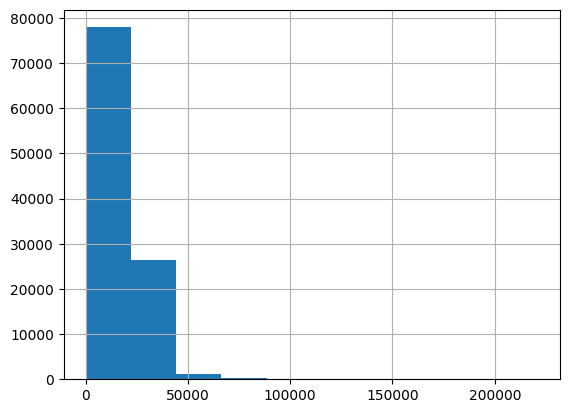

In [10]:
insurance["Value_vehicle"].hist()

<Axes: >

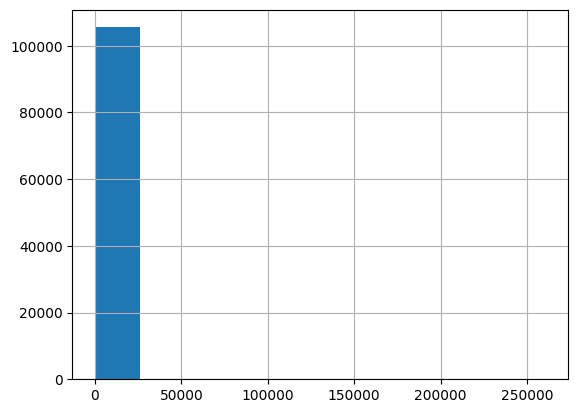

In [11]:
insurance["Cost_claims_year"].hist()


<Axes: >

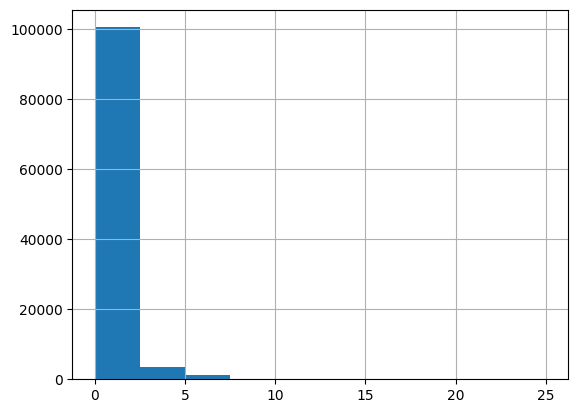

In [12]:
insurance["N_claims_year"].hist()

In [65]:
# col_rename_list = {
#     'index':'unique_key',
#     'age':'driver_age',
#     'expenses':'loss_amt',
# }
drop_col_list = [
    'Date_lapse','Date_driving_licence','Date_birth','Date_next_renewal',
    'Date_last_renewal','Date_start_contract',
]
# insurance = insurance.reset_index().rename(columns=col_rename_list).drop(columns=drop_col_list)
insurance = insurance.drop(columns=drop_col_list)

In [70]:
insurance.to_csv('./data/motor_veh_ins_data_cleaned.csv')